In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

#to standardize the data 
from sklearn import preprocessing

#decision tree
from sklearn import tree

#to split the data 
from sklearn.model_selection import train_test_split

#Apyori Library, for apriory algorithm
from apyori import apriori

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
data= pd.read_csv('Telecom Churn Customer.csv', header= 0)

In [3]:
'''
customerID: Customer ID
gender: Whether the customer is a male or a female
SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
Partner: Whether the customer has a partner or not (Yes, No)
Dependents: Whether the customer has dependents or not (Yes, No)
tenure: Number of months the customer has stayed with the company
PhoneService: Whether the customer has a phone service or not (Yes, No)
MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
Contract: The contract term of the customer (Month-to-month, One year, Two year)
PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
MonthlyCharges: The amount charged to the customer monthly
TotalCharges: The total amount charged to the customer
Churn: Whether the customer churned or not (Yes or No) '''

'\ncustomerID: Customer ID\ngender: Whether the customer is a male or a female\nSeniorCitizen: Whether the customer is a senior citizen or not (1, 0)\nPartner: Whether the customer has a partner or not (Yes, No)\nDependents: Whether the customer has dependents or not (Yes, No)\ntenure: Number of months the customer has stayed with the company\nPhoneService: Whether the customer has a phone service or not (Yes, No)\nMultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)\nInternetService: Customer’s internet service provider (DSL, Fiber optic, No)\nOnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)\nOnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)\nDeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)\nTechSupport: Whether the customer has tech support or not (Yes, No, No internet service)\nStreamingTV: Whether the customer 

In [4]:
data.dropna()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
#To randomly mix the data
from sklearn.utils import shuffle
data = shuffle(data)
# to reset indexes after shuffeling data
data.reset_index(inplace=True, drop=True)

In [6]:
del data['customerID']
del data['TotalCharges']
df= pd.get_dummies(data= data, drop_first= True)
df

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,55,25.65,0,1,1,1,0,1,0,...,0,1,0,0,1,1,1,0,0,0
1,1,31,99.95,0,0,0,1,0,1,1,...,1,0,1,0,0,1,0,1,0,1
2,0,10,80.25,0,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,1
3,0,63,104.75,1,0,0,1,0,1,1,...,1,0,1,0,1,1,0,0,0,0
4,1,47,85.20,0,0,0,1,0,1,1,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,60,79.05,1,1,1,1,0,0,0,...,1,0,1,0,0,1,1,0,0,0
7039,0,66,79.85,1,1,1,1,0,1,0,...,1,0,1,0,1,0,0,0,0,0
7040,1,5,45.70,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,1,0,1
7041,1,6,44.70,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [7]:
X= df.drop('Churn_Yes' , axis='columns')
y= df['Churn_Yes']
colnames = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes' , 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check' , 'PaymentMethod_Mailed check']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print( X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5282, 29) (1761, 29) (5282,) (1761,)


### we are going to select the best tree depth based on the receiver operating characteristic (roc)
### criteria [mean and standard deviation] , through cross validation

In [9]:


score_ls = []     # here I will store the roc auc
score_std_ls = [] # here I will store the standard deviation of the roc_auc

for tree_depth in [1,2,3,4]:
    
    model = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = tree_depth)
    
    scores = cross_val_score(model, X_train , y_train, cv=3, scoring='roc_auc')   
    
    score_ls.append(np.mean(scores))
    
    score_std_ls.append(np.std(scores))
    
temp = pd.concat([pd.Series([1,2,3,4]), pd.Series(score_ls), pd.Series(score_std_ls)], axis=1)
temp.columns = ['depth', 'roc_auc_mean', 'roc_auc_std']
print(temp)

   depth  roc_auc_mean  roc_auc_std
0      1      0.655876     0.006510
1      2      0.752776     0.008121
2      3      0.800143     0.011237
3      4      0.817869     0.014143


### as we can see, the best roc score is the 4th one , so, it is better to set the max depth as 4 for our customer churn dataset

In [10]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(167.4, 195.696, 'X[1] <= 16.5\ngini = 0.39\nsamples = 5282\nvalue = [3882, 1400]'),
 Text(83.7, 152.208, 'X[9] <= 0.5\ngini = 0.495\nsamples = 1905\nvalue = [1043, 862]'),
 Text(41.85, 108.72, 'X[1] <= 5.5\ngini = 0.413\nsamples = 1098\nvalue = [778, 320]'),
 Text(20.925, 65.232, 'X[15] <= 0.5\ngini = 0.478\nsamples = 601\nvalue = [364, 237]'),
 Text(10.4625, 21.744, 'gini = 0.5\nsamples = 362\nvalue = [181, 181]'),
 Text(31.387500000000003, 21.744, 'gini = 0.359\nsamples = 239\nvalue = [183, 56]'),
 Text(62.775000000000006, 65.232, 'X[27] <= 0.5\ngini = 0.278\nsamples = 497\nvalue = [414, 83]'),
 Text(52.3125, 21.744, 'gini = 0.219\nsamples = 376\nvalue = [329, 47]'),
 Text(73.2375, 21.744, 'gini = 0.418\nsamples = 121\nvalue = [85, 36]'),
 Text(125.55000000000001, 108.72, 'X[1] <= 1.5\ngini = 0.441\nsamples = 807\nvalue = [265, 542]'),
 Text(104.625, 65.232, 'X[18] <= 0.5\ngini = 0.252\nsamples = 169\nvalue = [25, 144]'),
 Text(94.16250000000001, 21.744, 'gini = 0.224\nsamples 

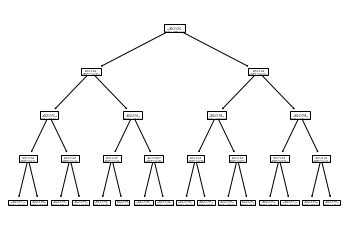

In [11]:
tree.plot_tree(model)

In [12]:
model.score(X_train,y_train)

0.7877697841726619

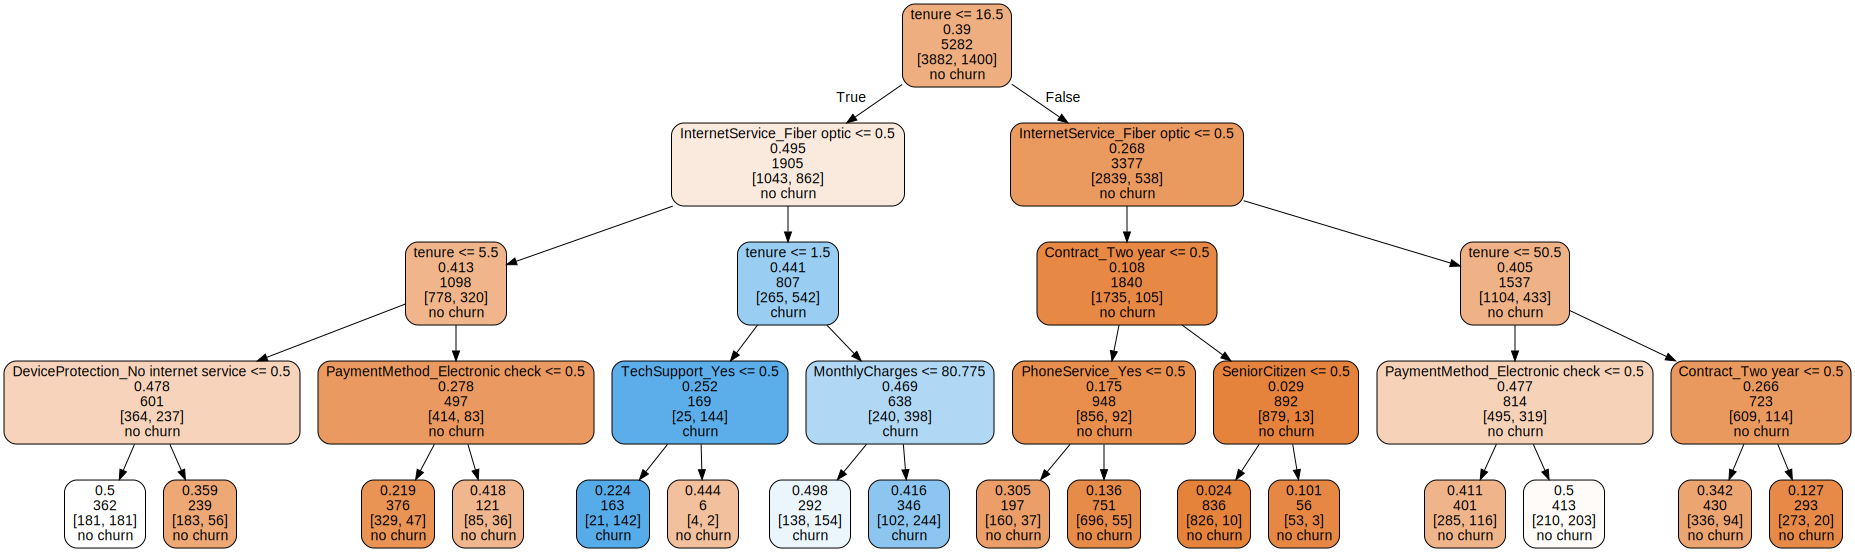

In [13]:
import graphviz
import pydotplus 
#Display the trained set decision tree
mytree= tree.export_graphviz(model, out_file= None ,filled = True, rounded= True, label = "Customer churn", feature_names = colnames,  class_names=['no churn','churn'])
graph= graphviz.Source(mytree)
graph

In [14]:
y_predict= model.predict(X_test)

In [15]:
cm = confusion_matrix(y_test,y_predict)

Text(33.0, 0.5, 'truth')

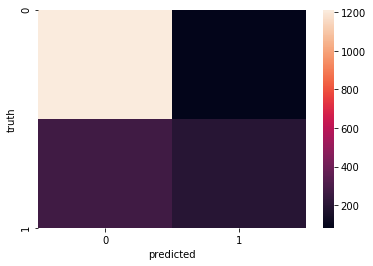

In [16]:
%matplotlib inline
plt.figure(figsize=(6,4))
sn.heatmap(cm)
plt.xlabel('predicted')
plt.ylabel('truth')


In [17]:
ac=accuracy_score(y_test, y_predict)
ac

0.7989778534923339

In [18]:
from sklearn.metrics import classification_report

In [19]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87      1292
           1       0.71      0.42      0.53       469

    accuracy                           0.80      1761
   macro avg       0.76      0.68      0.70      1761
weighted avg       0.79      0.80      0.78      1761



In [20]:
confusion_matrix(y_test, y_predict).ravel() 
# the following output shows consecutively True negative, True positive, False positive and true positive

array([1210,   82,  272,  197], dtype=int64)

In [21]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()

In [22]:
specificity = tn / (tn+fp)
sensitivity = tp/ (tp+fn)

In [23]:
sensitivity

0.4200426439232409

#### The model has predicted correctly the a very low percentage of Yes_Churn values correctly : the True-positive counter value is so close to the false positive value. Thus , the sensitivity score is humble 

In [24]:
specificity

0.9365325077399381

#### The model has predicted correctly the a very high percentage of No_Churn values correctly : False negative counter value is so low comparing to the True negative value,  which makes the specificity score high.

# Question II : Association rule

In [25]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [26]:
# Binning Tenure
bin_labels= ['low tenure', 'medium tenure', 'high tenure']
data['tenure_bins'] = pd.cut(x= data['tenure'], bins=[0,3.5,16.5,72], labels= bin_labels)                                                  

In [27]:
# Binning MonthlyCharges
bin_labels2= ['low monthly charges', 'moderate monthly charges', 'high monthly charges']
data['MonthlyCharges_bins'] = pd.cut(x= data['MonthlyCharges'], bins=[18.25,35.5,75.875,118.75], labels= bin_labels2)                                                  

In [28]:
# Binning SeniorCitizen
data['SeniorCitizen'] = data['SeniorCitizen'].map({0:'No', 1:'Yes'})


In [29]:
del data['tenure']
del data['MonthlyCharges']

In [30]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure_bins,MonthlyCharges_bins
0,Female,No,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),No,high tenure,low monthly charges
1,Female,Yes,No,No,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,Yes,high tenure,high monthly charges
2,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),Yes,medium tenure,high monthly charges
3,Male,No,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),No,high tenure,high monthly charges
4,Female,Yes,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),Yes,high tenure,high monthly charges


In [31]:
pwd

'C:\\Users\\amine\\Data mining course\\Data mining homeworks'

In [32]:
data.to_csv(r'C:\\Users\\amine\\Data mining course\\Data mining homeworks\\categorical_churn.csv', header=False, index = False)

In [33]:
newdata = pd.read_csv('categorical_churn.csv', header=None )
newdata

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,Female,No,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),No,high tenure,low monthly charges
1,Female,Yes,No,No,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,Yes,high tenure,high monthly charges
2,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),Yes,medium tenure,high monthly charges
3,Male,No,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),No,high tenure,high monthly charges
4,Female,Yes,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),Yes,high tenure,high monthly charges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,Yes,No,DSL,Yes,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),No,high tenure,high monthly charges
7039,Male,No,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),No,high tenure,high monthly charges
7040,Female,Yes,No,No,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,No,Electronic check,Yes,medium tenure,moderate monthly charges
7041,Male,Yes,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Credit card (automatic),No,medium tenure,moderate monthly charges


In [34]:
numrecords = len(newdata)
numrecords

7043

In [35]:
# The Apriori library we are going to use requires our dataset to be in the form of a list of lists,
# where the whole dataset is a big list and each transaction in the dataset is an inner list within the outer big list.
records = []
for i in range(0, 7043):
    records.append([str(newdata.values[i,j]) for j in range(0, 19)])


### Applying the Apriori Algorithm

In [45]:
association_rules = apriori(records, min_support= 0.01, min_lift= 3,  min_confidence=0.25, min_length=2 , max_length= 5)
association_results = list(association_rules)


In [46]:
print(len(association_results))

563


In [47]:
print(association_results[0])

RelationRecord(items=frozenset({'low monthly charges', 'No internet service'}), support=0.21652704813289791, ordered_statistics=[OrderedStatistic(items_base=frozenset({'No internet service'}), items_add=frozenset({'low monthly charges'}), confidence=0.9993446920052426, lift=3.996811280972699), OrderedStatistic(items_base=frozenset({'low monthly charges'}), items_add=frozenset({'No internet service'}), confidence=0.8659852356615559, lift=3.996811280972699)])


 ### The full Association Rules list : 

In [44]:
for item in association_results:

    # first index of the inner list
    # Contains base item and add item
    
    pair = item[0] 
    items = [x for x in pair]
    
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: low monthly charges -> No internet service
Support: 0.21652704813289791
Confidence: 0.9993446920052426
Lift: 3.996811280972699
Rule: No phone service -> Month-to-month
Support: 0.05338634104784893
Confidence: 0.5513196480938417
Lift: 3.1749339996115515
Rule: low monthly charges -> Female
Support: 0.10606275734772114
Confidence: 0.4895150720838794
Lift: 3.9903410332022715
Rule: Mailed check -> low monthly charges
Support: 0.10521084765014908
Confidence: 0.4855832241153342
Lift: 4.160538500540509
Rule: low monthly charges -> Male
Support: 0.11046429078517678
Confidence: 0.5098296199213631
Lift: 4.003043492871973
Rule: low monthly charges -> Month-to-month
Support: 0.07440011358795967
Confidence: 0.34338138925294887
Lift: 3.345000172210953
Rule: low monthly charges -> No
Support: 0.21652704813289791
Confidence: 0.9993446920052426
Lift: 3.996811280972699
Rule: One year -> low monthly charges
Support: 0.05154053670310947
Confidence: 0.9972527472527473
Lift: 3.988444689892731
Rule: Two